MAE of predicted sale price based some numerical features:
83.91438356164383
MAE of validation data using train_test_split function: 
26264.920547945207
 
best max leaf nodes = 70
 
MAE of validation data using train_test_split function and best max leaf nodes: 
23774.418633513866
 
MAE for random forest regressor: 
17377.950739726028
 
MAE for random forest regressor and best max leaf nodes: 
17403.339917218684


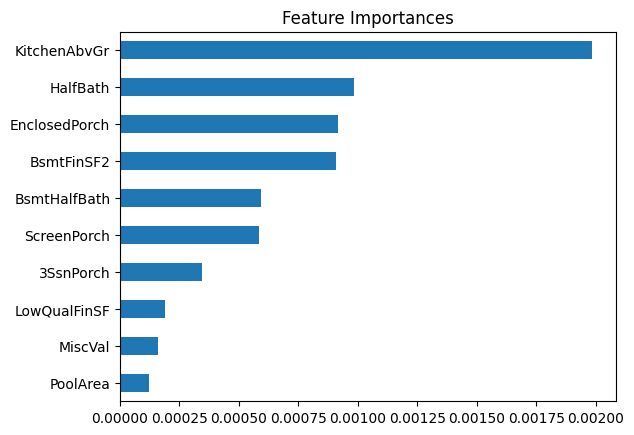

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
'''
Remember answer is in form ID, predicted price!!!   
'''

#importing the data
iowa_file_train = 'train.csv'
iowa_train_data = pd.read_csv(iowa_file_train)
iowa_file_test = 'test.csv' 
iowa_test_data = pd.read_csv(iowa_file_test)


#This code predicts the sale price of the first 5 properties based on certain features.

y = iowa_train_data.SalePrice  #column of SalePrice
#print(iowa_data.columns)
iowa_features = ['MSSubClass','LotFrontage','LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
X = iowa_train_data[iowa_features]
iowa_model = DecisionTreeRegressor(random_state =1)
iowa_model.fit(X,y)
predicted_home_prices = iowa_model.predict(X)
print('MAE of predicted sale price based some numerical features:')
#this prediction has a low MAE because DecisionTreeRegressor overfits and fits perfectly to the data


#calculating mean absolute error for for data based of features.
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y,predicted_home_prices))

#split training data into training and validation in order to test our model is accurate for new data.
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state=0)
iowa_model = DecisionTreeRegressor()
iowa_model.fit(train_X,train_y) 
val_predictions = iowa_model.predict(val_X)
print('MAE of validation data using train_test_split function: ')
print(mean_absolute_error(val_y,val_predictions))
#this error is very large because decision tree regressor OVERFITS so it is not an accurate model for new unseen data. 

#define get_mae a function using max_leaf_nodes
def get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes,random_state = 1)
    model.fit(train_X,train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y,preds_val)
    return(mae)
best_max_leaf_nodes = 70
print(' ')
print('best max leaf nodes = 70')

#using best max leaf nodes
from sklearn.model_selection import train_test_split
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state=0)
iowa_model = DecisionTreeRegressor(max_leaf_nodes=70,random_state =0)
iowa_model.fit(train_X,train_y) 
val_predictions = iowa_model.predict(val_X)
print(' ')
print('MAE of validation data using train_test_split function and best max leaf nodes: ')
print(mean_absolute_error(val_y,val_predictions))


#using random forest
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
iowa_preds = forest_model.predict(val_X)
print(' ')
print('MAE for random forest regressor: ')
print(mean_absolute_error(val_y, iowa_preds))

#using random forest and max_leaf_nodes
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(max_leaf_nodes=355,random_state=1)
forest_model.fit(train_X, train_y)
iowa_preds = forest_model.predict(val_X)
print(' ')
print('MAE for random forest regressor and best max leaf nodes: ')
print(mean_absolute_error(val_y, iowa_preds))

#Actual submission for competition, using our lowest MAE through random forest + 445 max leaf nodes:
Id = iowa_test_data.Id  #making a variable which is a list of all Id numbers
iowa_features = ['MSSubClass','LotFrontage','LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
X = iowa_test_data[iowa_features]
'''
min = 100000
for max_leaf_nodes in range(300,401):
    mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    if mae < min:
        min = mae
        best_leaf_nodes = max_leaf_nodes

print('The best max leaf nodes is', best_leaf_nodes)
print('The MAE is:', min)

'''

import matplotlib.pyplot as plt

feature_importances = pd.Series(forest_model.feature_importances_, index=iowa_features)
feature_importances.nsmallest(10).plot(kind='barh')
plt.title("Feature Importances")
plt.show()

'''
#PLOTTING MAX NODES VS MAE
import matplotlib.pyplot as plt

mae_list = []
node_list = list(range(300, 900, 50))  # Less steps to make it faster

for nodes in node_list:
    mae = get_mae(nodes, train_X, val_X, train_y, val_y)
    mae_list.append(mae)

plt.plot(node_list, mae_list)
plt.xlabel("max_leaf_nodes")
plt.ylabel("MAE")
plt.title("MAE vs max_leaf_nodes for RandomForest")
plt.show()
'''
#I removed basement half bath, column because it overfitted the data, mostly zeros, so the MAE was higher with it included. 

####USE CHATGPT TO LEARN ONE-HOT ECODING
iowa_train_data.select_dtypes(include=['object']).columns